# Lab: Linear Regression
Author: Lucas Iuri

## Importing Packages

### New Imports

We begin, as usual, by importing the libraries and functions we will use.

In [101]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

# New imports to this lab
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

# Specific from the package associated with the reference book
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

### Inspecting Objects and Namespace

We used the structure `from X import Y` so that we can call the function `Y` directly, without needing to acces it as a submodule of `X`. We can check the callable objects, also called namespace, using the function `dir()`.

In [102]:
dir()

['A',
 'Boston',
 'In',
 'MS',
 'Out',
 'VIF',
 'X',
 '_',
 '_10',
 '_100',
 '_11',
 '_12',
 '_13',
 '_14',
 '_15',
 '_16',
 '_17',
 '_18',
 '_2',
 '_20',
 '_22',
 '_23',
 '_24',
 '_25',
 '_26',
 '_27',
 '_28',
 '_3',
 '_31',
 '_32',
 '_33',
 '_35',
 '_36',
 '_37',
 '_39',
 '_4',
 '_40',
 '_41',
 '_43',
 '_44',
 '_45',
 '_46',
 '_47',
 '_48',
 '_49',
 '_50',
 '_51',
 '_53',
 '_55',
 '_56',
 '_57',
 '_58',
 '_59',
 '_6',
 '_60',
 '_61',
 '_64',
 '_65',
 '_66',
 '_68',
 '_69',
 '_7',
 '_70',
 '_72',
 '_73',
 '_74',
 '_76',
 '_77',
 '_78',
 '_79',
 '_8',
 '_80',
 '_81',
 '_82',
 '_83',
 '_84',
 '_86',
 '_88',
 '_89',
 '_90',
 '_91',
 '_92',
 '_93',
 '_94',
 '_97',
 '_98',
 '_99',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i100',
 '_i101',
 '_i102',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i2

Common `Python` functions like `print()` are inside the objects like `__builtins__`.
Any object has its own namespace.

In [103]:
A = np.array([[1,2,3],[4,5,6]])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',


In [104]:
A

array([[1, 2, 3],
       [4, 5, 6]])

We can now call any funtion of its namespace. Or check the function signature and purpose using `?`.

In [105]:
A.transpose?

Docstring:
a.transpose(*axes)

Returns a view of the array with axes transposed.

Refer to `numpy.transpose` for full documentation.

Parameters
----------
axes : None, tuple of ints, or `n` ints

 * None or no argument: reverses the order of the axes.

 * tuple of ints: `i` in the `j`-th place in the tuple means that the
   array's `i`-th axis becomes the transposed array's `j`-th axis.

 * `n` ints: same as an n-tuple of the same ints (this form is
   intended simply as a "convenience" alternative to the tuple form).

Returns
-------
p : ndarray
    View of the array with its axes suitably permuted.

See Also
--------
transpose : Equivalent function.
ndarray.T : Array property returning the array transposed.
ndarray.reshape : Give a new shape to an array without changing its data.

Examples
--------
>>> import numpy as np
>>> a = np.array([[1, 2], [3, 4]])
>>> a
array([[1, 2],
       [3, 4]])
>>> a.transpose()
array([[1, 3],
       [2, 4]])
>>> a.transpose((1, 0))
array([[1, 3],
    

In [106]:
A.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

## Simple Linear Regression

In this chapter is introduced some functions from the package created for the reference book named `ISLP`. It has a convenient function to load data so that we do not have to download and save the files provided by the authors. In this lab we will use the `Boston` data seen in the previous chapter. We can load and remember the data:

In [107]:
Boston = load_data('Boston')
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

We will now perform a simple linear regression using the `sm.OLS()` function. Our only predictor will be `lstat` and the response is `medv`. We will create a column `intercept` filled with ones to later check the $\beta_0$ coefficient of our linear regression.

In [108]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [109]:
y = Boston['medv']
model = sm.OLS(y,X)
results = model.fit()

Note that the `sm.OLS()` is used to only specify the model, and `model.fit()` is used to fit it to the actual data. This is a common pattern in many packages.
We can now use the `ISLP` function `summarize()` to get the coefficients, standard error, t-statistics and p-values of the fitted model.

In [110]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


### Using Transformations: Fit and Transform

Another common pattern is the `fit()` and `transform()`. In the previous regression we just used one predictor and it was straightforward to compute the prediction matrix. But if we want to use more predictors, the dataframe definition can get long and confusing. Some libraries like `sklearn` that we will see later use the notion o fitting and transforming data. Sometimes it is necessary or desired to perform transformations on the inputs (like adding an intercept column or do a normalization), but some of these transformations require that the data is processed (e.g. find an average, standard deviation, range, etc.). In these cases the processing is done using the `fit()` and the transformation using `transform()`.
This logic is introduced through the `ModelSpec()` imported as `MS` in the preamble.

In [111]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


Note that we got the same result as before. This process can be done directly by using the `fit_transform()` function.

In [112]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


We can get a more exhaustive description of our fitted model using the `results.summary()` function and get the coefficients of the linear regression using the `params` attribute of `results`.

In [113]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           5.08e-88
Time:                        08:13:12   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

Next we will use the fitted model to get predictions from new values. We begin by creating new values and transforming them using the fitted `design`.

In [115]:
new_df = pd.DataFrame({'lstat':[5,10,15]})
new_X = design.transform(new_df)
new_X

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


Now to get the predictions we use the `results.get_prediction()` of the fitted model and accessing the `predicted_mean` attribute.

In [116]:
new_predictions = results.get_prediction(new_X)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

We can also get the confidence intervals of the predictions.

In [117]:
new_predictions.conf_int(alpha = 0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

Or the prediction intervals by setting the parameter `obs = True`.

In [118]:
new_predictions.conf_int(alpha = 0.05, obs = True)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

As expected, the prediction interval is wider.

### Defining Functions

We can define functions in `Python` as in any other programming language. We use de `def` keyword and the function implementations follows the same identation pattern as loops. Functions can receive parameters that will be used inside of it. Considering parameters, there are two special parameter that are conventionally called `*args` and `**kwargs` that are used to pack any number of unnamed and named parameters, respectively.

We will now define a function to draw a line in a plot, that we will use to show the regression line.

In [119]:
def abline(ax, b, m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

This function receives as parameter an `ax` that the line will be plotted on, the intercept coefficient `b` and angular coefficient `m`  resulted from the linear regression, and the `*args` and `**kwargs` that can be used to modify the plot appearance.

We can now use this function to add the regression line to the scatter plot of our data.

C:\Users\lucas\AppData\Local\Temp\ipykernel_158852\2467485700.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0], results.params[1], 'r--', linewidth = 3)


Text(0.5, 1.0, 'Linear Regression on Boston Data')

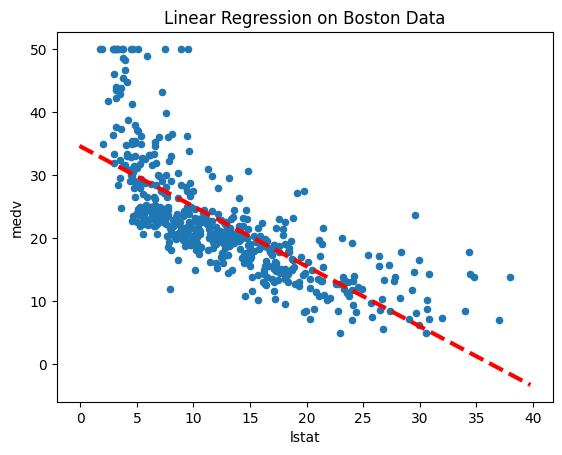

In [120]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax, results.params[0], results.params[1], 'r--', linewidth = 3)
ax.set_title('Linear Regression on Boston Data')

Now we can examine some diagnostic plots using the attributes of `results` returned on the linear regression fit. We begin by checking on the residuals.

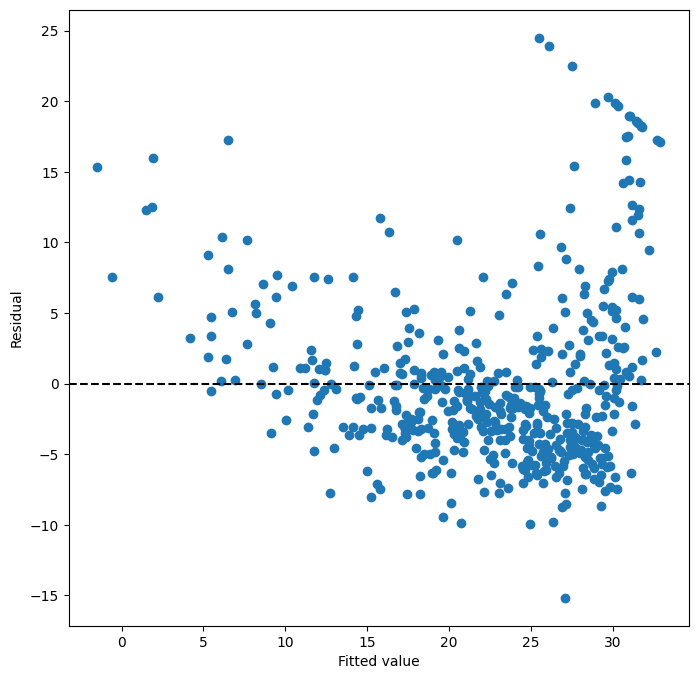

In [121]:
ax = subplots(figsize = (8,8))[1] # we will only use the ax returned by subplots (bot the fig)
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c = 'k', ls = '--'); # function to add a horizontal line at y = 0

This plot shows a linear tendency between the residual, which is an evidence of non-linearity between the predictor and the response used.

We can also check the influence and leverage of each observation by using the `hat_matrix_diag` of the `get_influence()` method os the regression fit object.

np.int64(374)

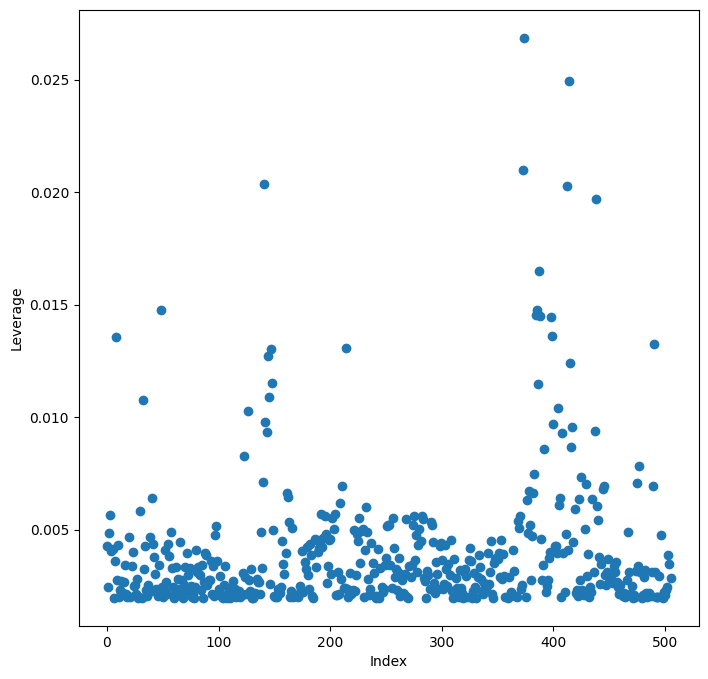

In [122]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag) # get the index of the observation with greatest leverage

## Multiple Linear Regression

To fit a multiple linear regression model is very straightforward, we can follow the same pattern that we did with only one predictor using `ModelSpec()` and `sm.OLS()`, the only difference is that we use a list of predictors. 

In [123]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


The `Boston` data frame has 13 columns. It would be too cumbersome to list all the predictors in the list. We can, on the other hand, take all the columns and just drop our response.

In [124]:
predictors = Boston.columns.drop('medv')
predictors

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

Now we can fit the model with all the predictors just the same way.

In [125]:
X = MS(predictors).fit_transform(Boston)
model = sm.OLS(y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


We can follow this logic to drop other predictors as well. In our example `age` has a very large p-value, so if we want to discard it in our model we can just drop it along with the response.

In [126]:
predictors = Boston.columns.drop(['medv', 'age'])
predictors

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [135]:
X = MS(predictors).fit_transform(Boston)
model1 = sm.OLS(y,X)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


## Multivariate Goodness of Fit

It is possible to access the results attributes by name. `dir()` can help us with that.

In [128]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pval

In [129]:
print(f'The R-squared value of the model is: {results.rsquared:.3f}')

The R-squared value of the model is: 0.734


The *Variance Inflation Factor* (VIF) can be a good measure of collinearity.

In [130]:
VIF?

Signature: VIF(exog, exog_idx)
Docstring:
Variance inflation factor, VIF, for one exogenous variable

The variance inflation factor is a measure for the increase of the
variance of the parameter estimates if an additional variable, given by
exog_idx is added to the linear regression. It is a measure for
multicollinearity of the design matrix, exog.

One recommendation is that if VIF is greater than 5, then the explanatory
variable given by exog_idx is highly collinear with the other explanatory
variables, and the parameter estimates will have large standard errors
because of this.

Parameters
----------
exog : {ndarray, DataFrame}
    design matrix with all explanatory variables, as for example used in
    regression
exog_idx : int
    index of the exogenous variable in the columns of exog

Returns
-------
float
    variance inflation factor

Notes
-----
This function does not save the auxiliary regression.

See Also
--------
xxx : class for regression diagnostics  TODO: does not exist

Since `VIF()` receives the design matrix and the index of the predictor we want to compute we can use *list comprehensions* to compute all the VIFs in a straight way. List comprehensions are a feature of `Python` to facilitate tasks like this where we want to perform some computation on many elements and match them by index. It is just a way to perform simpler tasks without loops.

In [131]:
vif_vals = [VIF(X,i) for i in range(1, X.shape[1])]
vif_df = pd.DataFrame({'vif': vif_vals}, index = X.columns[1:])
vif_df

,vif
crim,1.767455
zn,2.265259
indus,3.987176
chas,1.068018
nox,4.070020
rm,1.834792
dis,3.613722
rad,7.396707
tax,8.994939
ptratio,1.785403


## Interaction Terms

To add interaction terms we can just add a tuple in the parameter of the `ModelSpec()` function.

In [132]:
X = MS(['lstat', 'age', ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y,X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


## Non-linear Transformations of the Predictors

Not all the regressions have to be linear. We can perform transformations on the predictors in order to get polynomial regressions. Simply put, it means adding terms of a predictor raised to some power to fit it along with the other predictors to get the coefficients. The `poly()` function provided with the `ISLP` package helps achieve it.

In [133]:
X = MS([poly('lstat', degree = 2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y,X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


The low p-value of the quadratic term (third row) suggests that the model is improved by adding this transformation.

We can measure this improvement using `anova_lm()` to compare both models.

In [137]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


The `anova_lm()` function tested both models with the null hypothesis that the quadratic term is not needed, and the alternative hypothesis is that the bigger model is superior. The *F*-statistic and its associated *p*-value in this case confirms that the polynomial model is better. It is not a surprise, since we saw evidences of non-linearity before.

Let us check this improvemente visually.

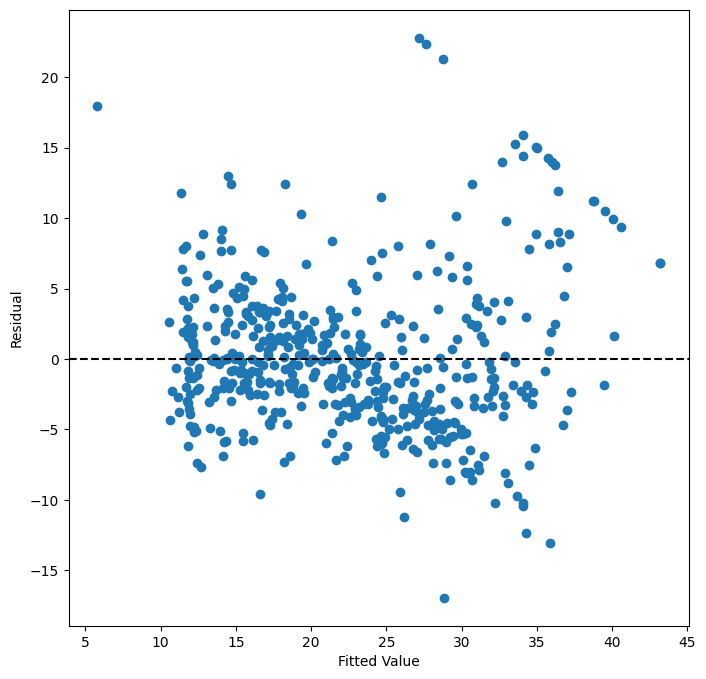

In [138]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls = '--')

Different from the previous residual plot, this one does not show any pattern, which is a consequence of the model improvement. If we want to fit higher-degree polynomial, we just have to pass the degree to the `poly()` function.

## Qualitative Predictors

When we have categorical predictor, the `ModelSpec()` function performs the *one-hot encoding* automatically. We will load the `Carseats` data that contains several predictors of 400 locations where child car seats are sold and we will try fit a model to predict `Sales`. This dataset contains some categorical predictor like `ShelveLoc` that describes the quality of the shelving location and can take the values `Good`, `Medium` or `Bad`.

We can create and fit a model just the same way we did with numerical predictors.

In [139]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [140]:
allvars = list(Carseats.columns.drop('Sales')) # we cast it to a list to add more terms
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'), ('Price', 'Age')] # adding two more interaction terms

X = MS(final).fit_transform(Carseats)
model = sm.OLS(y,X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


The low *p*-value of the variables associated with shelving location is an indication that it is relevant to predict carseat sales. `ShelveLoc[Good]` has a positive coefficient, indicating that good shelving positions have impact on sales. `ShelveLoc[Medium]` also has a positive coefficient but it is lower, hinting that medium-quality locations are still better than bad ones, but sell less than good positions.